In [ ]:
import os
import json

In [ ]:
kaggle_token={"username":"ssanthiya2308","key":"b8375efaded1377dc8007dac296cc9d2"}

In [ ]:
os.makedirs("/root/.kaggle", exist_ok=True)

In [ ]:
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
print(" Kaggle authentication setup completed.")

 Kaggle authentication setup completed.


In [ ]:
!kaggle datasets download -d maitridsavla/alzimer-segmented

Dataset URL: https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented
License(s): unknown
alzimer-segmented.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("alzimer-segmented.zip", 'r') as zip_ref:
    zip_ref.extractall("cancer")
print("Dataset unzipped!")

Dataset unzipped!


In [ ]:
cancer_classes = os.listdir("/content/cancer/segmented_images/train")
print(" Flower classes:", cancer_classes)


 Flower classes: ['VeryMildDemented', 'MildDemented', 'ModerateDemented', 'NonDemented']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE=224
BATCH_SIZE=32


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory( '/content/cancer/segmented_images/train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training')


Found 4098 images belonging to 4 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory( '/content/cancer/segmented_images/train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation')


Found 1023 images belonging to 4 classes.


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)
class_names = list(class_indices.keys())
print(class_names)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4602 - loss: 1.1055

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.4606 - loss: 1.1048 - val_accuracy: 0.4780 - val_loss: 1.0621
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.6126 - loss: 0.8851 - val_accuracy: 0.3539 - val_loss: 1.2715
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.7104 - loss: 0.6651 - val_accuracy: 0.3646 - val_loss: 1.4312
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.7797 - loss: 0.5144 - val_accuracy: 0.3656 - val_loss: 1.7331
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.8746 - loss: 0.3293 - val_accuracy: 0.4448 - val_loss: 1.7090
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.9266 - loss: 0.2080 - val_accuracy: 0.5523 - val_loss: 1.7468
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.9650 - loss: 0.0978 - val_accuracy: 0.5425 - val_loss: 1.9910
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 430s 3s/step - accuracy: 0.9846 - loss: 0.0510 - val_accuracy: 0.504

In [ ]:
model.save('/content/cancer/segmented_images/train/ALzimer.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/cancer/segmented_images/train/ALzimer.h5')
print("Model Loaded")

Model Loaded


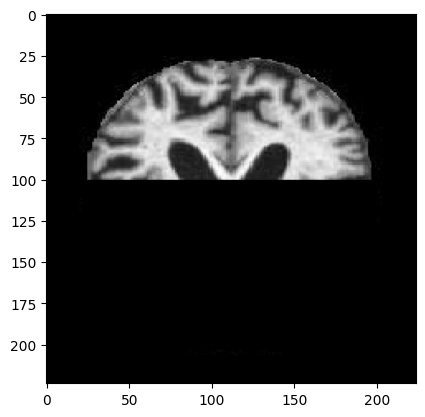

In [ ]:
test_image_path="/content/cancer/segmented_images/test/ModerateDemented/28 (2).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction =model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
ModerateDemented
